
#<center> **A Generalized Tool for Wave-by-Wave Estimation of Nearshore Wave Breaking Patterns from Optical Imagery**<center>

### <center>Francisco J. Sáez $^{a,*}$, Patricio A. Catalán $^{a}$, Carlos Valle $^{b}$<center>
\\

##### <center>$^{a}$ Departamento de Obras Civiles, Universidad Técnica Federico Santa María, Valparaíso, Chile<center>
#####<center>$^{b}$ Departamento de Computación e Informática, Universidad de Playa Ancha Valparaíso, Chile<center>


_$^{∗}$ Corresponding author_.

\\

**Author**    : Francisco Sáez Rosales

**E-mail addresses**: francisco.saez@sansano.usm.cl (F.J. Sáez), patricio.catalan@usm.cl (P.A. Catalán), carlos.valle@upla.cl (C. Valle).


**Date**      : 12-09-2024

In [6]:
# Descargar el repositorio desde GitHub
!git clone https://github.com/fj23eslaonda/ICCE2024.git
%cd ICCE2024

# Verificar el contenido del directorio
!ls

import Functions.install_packages

# DUCK MODEL
from Duck_Model.freeze_weight import freeze_weight

# NET FUNCTIONS
from Neural_Network.create_inputs import *
from Neural_Network.images_to_matrix import *
from Neural_Network.conv2d_block import *
from Neural_Network.get_unet import *
from Neural_Network.f1 import *

# TL FUNCTIONS
from Functions.query_functions import *
from Functions.transfer_learning import *
from Functions.ensemble_and_plot import *
from Functions.friendly_functions import *
from Functions.function_to_save import *

params ={'project_name': 'DuckData',
         'folder_img': 'all_images',
         'len_xtr': 20,
         'len_xretr': 300,
         'len_xtst': 200,
         'img_format':'png',
         'processing': False ,
         'resize': False,
         'rotation': False,
         'rotation_angle':0,
         'len_img_name': 10
         }

paths = all_paths(username      = 'Saez',
                  images_folder = 'DuckData', # Folder where you save your images => 'project_name': 'Las_Cruces'
                  arrays_folder = 'DuckData', # Folder where you save your images as matrix  => 'project_name': 'Las_Cruces'
                  model2use     = 'model_1')    # Configuration of the model to be used


x_tr, y_tr, x_val, y_val, x_retr, x_tst = load_datasets_from_array(paths  = paths,
                                                                   x_tr   = True,
                                                                   y_tr   = True,
                                                                   x_retr = True,
                                                                   x_tst  = False
                                                                   )

model_setup = {'learning_rate': 1e-2,
               'epochs': 50,
               'batch_size': 2,
               'verbose': True}

data = {'x_tr':   x_tr,
        'y_tr':   y_tr,
        'x_val':  x_val,
        'y_val':  y_val,
        'x_retr': x_retr
        }

model = freeze_weight(paths, 'model_1')

UNet_engine(paths,
            model,
            data,
            iterations     = 3,
            n_img          = 10,
            model_selected = 'model_1',
            model_setup    = model_setup)

Mounted at /content/drive
 1013-JEG_OCT_MA_10_11_14.pdf			'Presentación sin título.gslides'
'15 MAT-PREUC.pdf'				 raindrop_net
 2968-CLV_JEG01_FM_CC_19_05_14.pdf		'Sáez&Sáez Hidráulica'
'AC DC.docx'					 Spectrums
'AGRICOLA SANTO DOMINGO'			'Taller Avanzado 01.pdf'
'Aprendocalculo - diagnostico.pdf'		'Taller Avanzado 02.pdf'
 CDF						'Taller Avanzado 03.pdf'
 Comprobante-TEF_IPE2404151901114178382520.pdf	'Taller Avanzado 04.pdf'
'De la guitarra - Intoxicados..mp3'		'Taller Avanzado 05.pdf'
 FEGLA						'Taller Avanzado 06.pdf'
 Física						'Taller Avanzado 07.pdf'
'Francisco AC DC.doc'				'Taller Avanzado 08.pdf'
 GOPR9349.MP4					'Taller Avanzado 09.pdf'
 IMG_8766.MOV					'Taller Avanzado 10.pdf'
'Inducción electromagnética .pptx'		'Taller Avanzado 11.pdf'
'Instrucciones para los participantes.pdf'	'Taller Avanzado 12.pdf'
 Matemáticas					 TEST_WBM
'Mi película.mp4'				 Wavebreaking_model


ModuleNotFoundError: No module named 'Duck_Model'

## 3.2 LOAD RESULTS

In [ ]:
# Models
model_names = ['Model_1']
# Iterations
number_iterations = ['Iteration_1',
                     'Iteration_2',
                     'Iteration_3']

# Load results for models selected
results = load_results(paths, model_names)

Model_2
Results loaded


In [ ]:
# Load models
models_loaded = load_models(paths,
                            model_names,                          # Name of Models
                            number_iterations)                    # Number of Iterations

scores_loaded = load_score_per_models(results,                    # Results per models and iterations
                                      model_names,                # Name of Models
                                      number_iterations)          # Number of Iterations

Model_2 of Iteration_1 Loaded
Model_2 of Iteration_2 Loaded
Model_2 of Iteration_3 Loaded
Scores Loaded


## 3.3 Plot Accuracy and Loss


Model_5


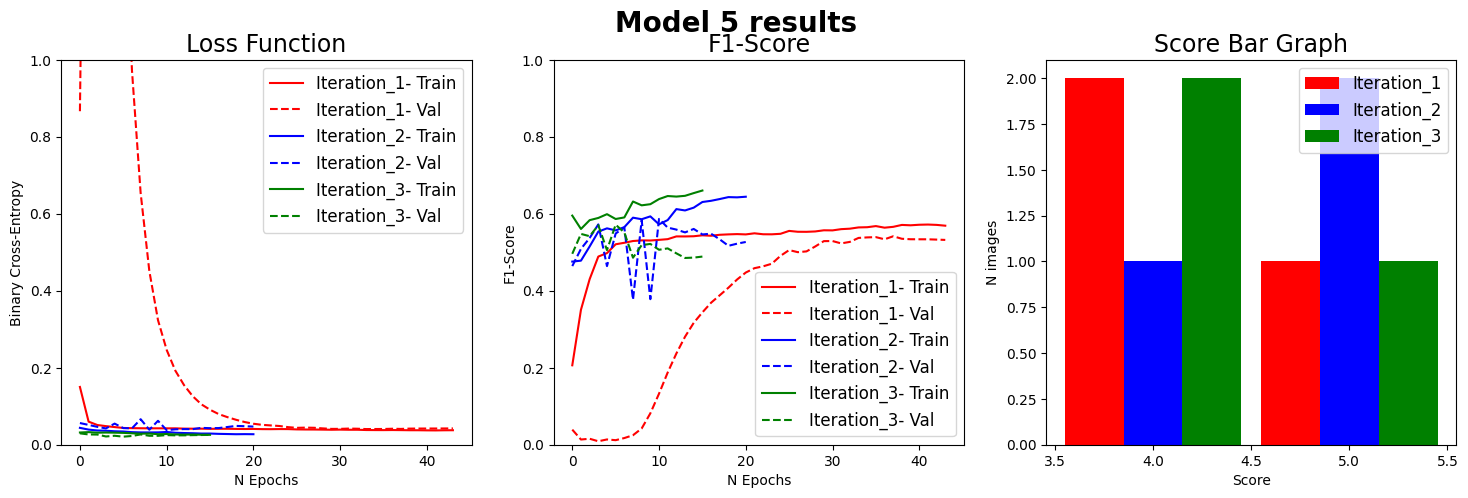

In [ ]:
# Plot results
plot_results_per_model(results,              # Dictorinary with results
                       model_names,          # models
                       number_iterations)    # iterations

# 4. Ensemble

**Description:** the main idea is use a linear combination of the best models. Then the final breaking mask is an weigth average of all models selected.

$$\text{mask} = \sum_{i}^{M} \sum_{j}^{N} \alpha_{ij}\hspace{1mm}\text{mask}_{ij} $$

where $\text{mask}$ is `y_pred = model.predict(x_tst)`, $M$ is number of models, $N$ is number of iterations and $\alpha$ is the weight for each model.


## 4.1 Ensemble prediction on Test Set

In [ ]:
# Load test set to play!
x_tst = np.load(paths['arrays'] / 'x_tst.npy')

In [ ]:
# Ensemble process
masks_ensemble = ensemble_models(models_loaded,                                  # Models to ensemble
                                 model_names,                                    # Model to use
                                 scores_loaded,                                  # Score per model
                                 number_iterations,                              # Iterations per model
                                 x_tst)                                          # Test Set

6/6 [==============================] - 49s 5s/step

Model_2 of Iteration_1 prediction done with weight= 28.999999999999996%

6/6 [==============================] - 3s 565ms/step

Model_2 of Iteration_2 prediction done with weight= 43.0%

6/6 [==============================] - 3s 571ms/step

Model_2 of Iteration_3 prediction done with weight= 28.999999999999996%



## 4.2 Plot Ensemble Predictions

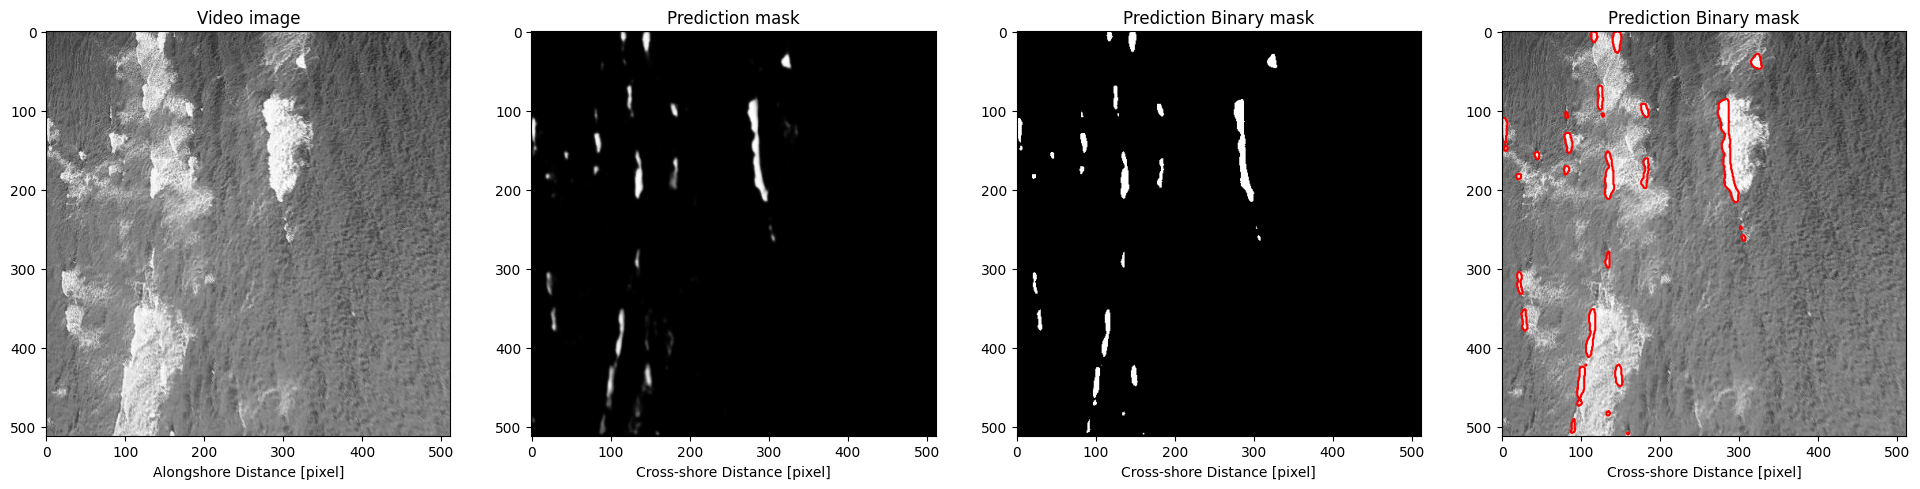

In [ ]:
plot_predictions(x_tst,                   # DataSet to make the prediction
                 masks_ensemble,          # Breaking Masks - prediction
                 model_names,             # Model used
                 index = 40,               # N° of image
                 threshold=0.3)           # Threshold to get binary mask›


##4.3 Save results

In [ ]:
img_post = full_dataset_processing(params, 'All_images')

Subset N°2 of 2 was created 



In [ ]:
img_from = 'All_images'
prediction_on_whole_dataset(params,                 # params to preprocessing images
                            paths,                  # paths
                            img_from,               # folder of all images
                            model_names,            # names of models to use
                            models_loaded,          # loaded models
                            scores_loaded,          # loaded scores
                            number_iterations)      # used number of iterations

#----------------------------------------------
#
#      Model_5 predictions - subset N°1
#
#----------------------------------------------


13/13 [==============================] - 19s 2s/step

Model_5 of Iteration_1 prediction done with weight= 33.0%

13/13 [==============================] - 7s 549ms/step

Model_5 of Iteration_2 prediction done with weight= 50.0%

13/13 [==============================] - 7s 549ms/step

Model_5 of Iteration_3 prediction done with weight= 17.0%

Subset N°1: masks saved! 
 
#----------------------------------------------
#
#      Model_5 predictions - subset N°2
#
#----------------------------------------------


4/4 [==============================] - 6s 2s/step

Model_5 of Iteration_1 prediction done with weight= 33.0%

4/4 [==============================] - 2s 541ms/step

Model_5 of Iteration_2 prediction done with weight= 50.0%

4/4 [==============================] - 2s 540ms/step

Model_5 of Iteration_3 prediction done with weight= 17.0%

Subset N°

In [ ]:
save_img_predicted(paths, params, 'Model_2', 'All_images', 0.3)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]